In [104]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightkurve as lk

from tessrip import Rip
from astropy.time import Time
from tqdm import tqdm
from tess_asteroid_ml import *
import seaborn as sb

import tarfile

In [100]:
sector = 5

big_cat = []

for sector in tqdm(range(1, 14), total=13):
    for camera in range(1, 5):
        scc_str = f"s{sector:04}-{camera}-{0}"
        
        jpl_sbi_file = (f"{os.path.dirname(PACKAGEDIR)}/data/jpl"
                        f"/jpl_small_bodies_tess_{scc_str}_catalog.csv")    
        if os.path.isfile(jpl_sbi_file):
            print("Loading from CSV file...")
            jpl_sb = pd.read_csv(jpl_sbi_file, index_col=0)
            big_cat.append(jpl_sb)

 ... (more hidden) .../var/folders/j8/c7r_2l5j7n5f0kstmn4l5w8h0000gn/T/ipykernel_33357/353259467.py:13: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  jpl_sb = pd.read_csv(jpl_sbi_file, index_col=0)
 ... (more hidden) ...

Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...


 ... (more hidden) ...

Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...


/var/folders/j8/c7r_2l5j7n5f0kstmn4l5w8h0000gn/T/ipykernel_33357/353259467.py:13: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  jpl_sb = pd.read_csv(jpl_sbi_file, index_col=0)
 ... (more hidden) ...

Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...


 ... (more hidden) ...

Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...


/var/folders/j8/c7r_2l5j7n5f0kstmn4l5w8h0000gn/T/ipykernel_33357/353259467.py:13: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  jpl_sb = pd.read_csv(jpl_sbi_file, index_col=0)
 ... (more hidden) ...

Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...


/var/folders/j8/c7r_2l5j7n5f0kstmn4l5w8h0000gn/T/ipykernel_33357/353259467.py:13: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  jpl_sb = pd.read_csv(jpl_sbi_file, index_col=0)
 ... (more hidden) ...

Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...


 ... (more hidden) ...

Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...
Loading from CSV file...


In [101]:
big_cat_1 = pd.concat(big_cat).drop_duplicates(subset=["Object name"]).reset_index(drop=True)

In [118]:
big_cat_1.query("V_mag < 24")

,Object name,Astrometric RA (hh:mm:ss),"Astrometric Dec (dd mm'ss"")",Visual magnitude (V),"RA rate (""/h)","Dec rate (""/h)",ra,dec,V_mag,name,...,Magnitude slope (G),Eccentricity,Perihelion (au),Time of perihelion passage (JD),Longitude of ascending node (deg),Argument of perihelion (deg),Inclination (deg),Epoch (JD),H_mag,kind
0,14 Irene (A851 KA),20:18:32.62,-28:16:09.1,10.2,-37.7000,-14.660,304.635917,-28.269194,10.2,14 Irene,...,0.15,0.163735,2.165955,2.460944e+06,86.027807,97.907108,9.123808,2460400.5,6.55,a
1,47 Aglaja (A857 RA),21:42:37.15,-20:20:44.9,11.7,-31.3100,-10.020,325.654792,-20.345806,11.7,47 Aglaja,...,0.16,0.130382,2.506289,2.460132e+06,3.048636,315.475880,4.973808,2460400.5,8.20,a
2,55 Pandora (A858 RB),20:31:07.63,-30:10:03.9,11.3,-37.7300,-7.225,307.781792,-30.167750,11.3,55 Pandora,...,0.15,0.144925,2.360695,2.460270e+06,10.352186,5.385047,7.177599,2460400.5,7.86,a
3,70 Panopaea (A861 JA),22:05:41.20,-34:17:55.4,11.0,-27.8300,-22.000,331.421667,-34.298722,11.0,70 Panopaea,...,0.14,0.182227,2.138606,2.459845e+06,47.651835,255.575170,11.598061,2460400.5,8.20,a
4,81 Terpsichore (A864 SA),22:17:00.09,-19:05:47.0,12.9,-26.3200,-9.890,334.250375,-19.096389,12.9,81 Terpsichore,...,0.15,0.212253,2.247969,2.460421e+06,0.940849,51.386776,7.801877,2460400.5,8.71,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412609,(2014 OJ392),04:30:18.41,-52:55:00.5,22.3,-42.7200,-116.200,67.576708,-52.916806,22.3,NaN,...,0.15,0.292203,0.826806,2.460448e+06,316.909550,242.174790,35.357162,2460400.5,21.74,a
412610,(2019 KJ2),12:34:50.51,-56:24:48.6,23.0,0.1943,54.860,188.710458,-56.413500,23.0,NaN,...,0.15,0.026481,1.029169,2.460292e+06,61.666135,252.522530,3.143793,2460400.5,27.13,a
412612,(2011 WR29),01:52:57.62,-52:09:55.6,23.7,61.7600,-24.870,28.240083,-52.165444,23.7,NaN,...,0.15,0.058705,1.523446,2.455947e+06,63.150917,31.674005,36.766647,2455889.5,20.75,a
412615,(2020 RS3),02:27:17.67,-59:30:00.5,21.4,-272.1000,-425.100,36.823625,-59.500139,21.4,NaN,...,0.15,0.604925,0.341804,2.460380e+06,355.291630,158.769640,9.308498,2460400.5,22.80,a


In [107]:
aster_names = []
for sector in range(1, 14):
    tarf = f"{os.path.dirname(PACKAGEDIR)}/data/jpl/tracks/sector{sector:04}.tar"
    tardb = tarfile.open(tarf, mode="r")
    aster_names.extend(tardb.getnames()[1:])
aster_names = np.array([x.split("/")[-1].split("_")[-2] for x in aster_names])

In [119]:
aster_names

array(['2013-RV103', '2002-RH41', '2001-RP53', ..., '2014-PY33',
       '2003-RE10', '2014-QZ537'], dtype='<U25')

In [122]:
mask = np.isin(big_cat_1.query("V_mag < 24").id.values, aster_names)

In [123]:
mask.shape

(400514,)

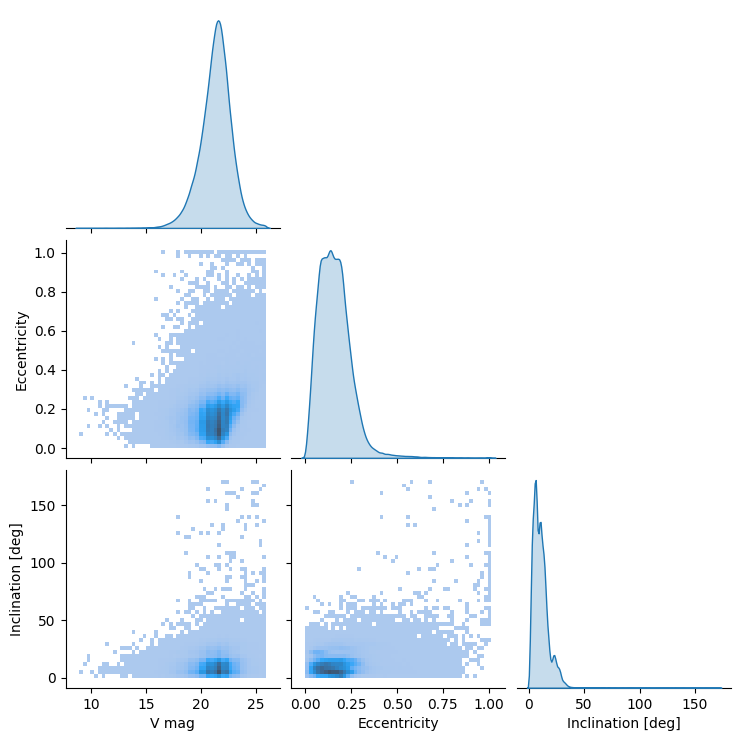

In [99]:
plot_vars = ["V_mag", "Eccentricity", "Inclination (deg)"]

fig = sb.pairplot(big_cat_1.query("V_mag < 26"), 
                  vars=plot_vars, 
                  kind='hist', 
                  diag_kind='kde', 
                  corner=True, 
                  markers=".", 
                  # plot_kws={"edgecolor": "none", "alpha": 0.2},
                  plot_kws={"bins": 50}
                 )
# fig.axes[0,0].set_ylabel("V mag")
fig.axes[1,0].set_ylabel("Eccentricity")
fig.axes[2,0].set_ylabel("Inclination [deg]")
fig.axes[2,0].set_xlabel("V mag")
fig.axes[2,1].set_xlabel("Eccentricity")
fig.axes[2,2].set_xlabel("Inclination [deg]")

dir_name = f"{os.path.dirname(PACKAGEDIR)}/data/figures/paper_plots"
if not os.path.isdir(dir_name):
    os.makedirs(dir_name)
dir_name = (
    f"{dir_name}/jpl_sbd_tess_y2.pdf"
)
fig.tight_layout()
plt.savefig(dir_name, bbox_inches="tight")

plt.show()

In [75]:
fig.axes[1,0]

<Axes: xlabel='V_mag', ylabel='Eccentricity'>

In [73]:
fig.axes

array([[<Axes: ylabel='V mag'>, None, None],
       [<Axes: xlabel='V_mag', ylabel='Eccentricity'>, <Axes: >, None],
       [<Axes: xlabel='V_mag', ylabel='Inclination (deg)'>,
        <Axes: xlabel='Eccentricity', ylabel='Inclination (deg)'>,
        <Axes: xlabel='Inclination (deg)'>]], dtype=object)

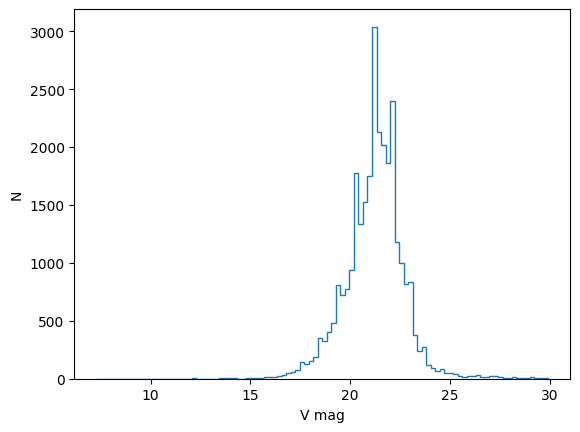

In [35]:
plt.hist(big_cat_1.V_mag, bins=100, histtype="step")
plt.xlabel("V mag")
plt.ylabel("N")
plt.show()